In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import SpectralClustering

In [2]:

N = 150
noises = 0.05
random_state = 42

X_circle,y_circle = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )

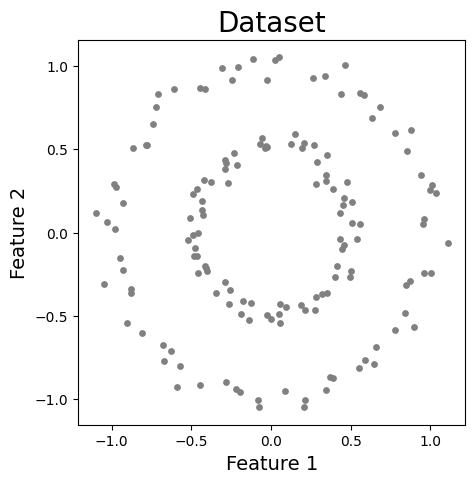

In [3]:

plt.figure(figsize=(5,5))
plt.scatter(X_circle[:,0],X_circle[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X_circle)
display(y_circle)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [5]:
def plot_cluster(data, model):

    labels = model.fit_predict(data)
    ax = plt.subplot(1, 1, 1)

    ax.scatter(X[:, 0], X[:, 1],
                    c=labels,
                    alpha = 0.75,
                    cmap = 'bwr',
                    edgecolor = 'k',
                    s = 100
               )
    plt.xticks([],[])
    plt.yticks([],[])

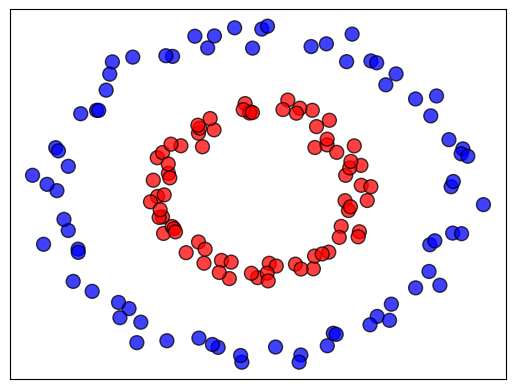

In [21]:
#@title Application of Spectral Clustering  { run: "auto" }
#@markdown ###  number of clusters
n_clusters = 2 #@param {type:"slider", min:2, max:10, step:1}
#@markdown ### approach to calculating the adjacency matrix
affinity = 'nearest_neighbors' #@param ["nearest_neighbors", "rbf"]{type:"string"}
#@markdown ### radial function parameter
gamma = 1 #@param {type:"slider", min:-2, max:2, step:0.25}
#@markdown ### number of K neighbors
n_neighbors = 9 #@param {type:"slider", min:1, max:25, step:4}

gamma = 10** gamma

# Создаем Класс Спектральной Кластеризации
model = SpectralClustering(n_clusters=n_clusters,
                        affinity=affinity,
                        gamma= gamma,
                        n_neighbors = n_neighbors)

plot_cluster(X, model)

In [22]:
from numpy import linalg as LA
from scipy.sparse import csgraph

L = csgraph.laplacian(model.affinity_matrix_, normed = True)
eigenvalues, eigenvectors = LA.eigh(L.todense())

sorted_indexes = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indexes]
eigenvectors = np.array(eigenvectors[:,sorted_indexes])

In [23]:
pd.DataFrame(X_circle).shape

(150, 2)

In [24]:
import seaborn as sns
cm = sns.color_palette("vlag", as_cmap=True)
dataframe= pd.DataFrame(eigenvectors).style.background_gradient(cmap=cm,
                                        vmin = 0,
                                        vmax = 1
                                        ).format(precision=3)

display(dataframe)

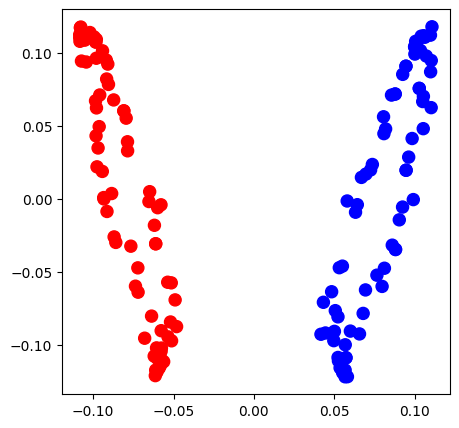

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))

ax.scatter(eigenvectors[:,1],
           eigenvectors[:,2],
           cmap = 'bwr',
           c=y_circle,
           s = 75);